In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.ticker import MultipleLocator
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set_palette('deep')
plt.rcParams['text.usetex'] = True

In [2]:
totalsize = [1000001]
V = [0.01]
omega = [0,0.1,0.5]
disorder = [2]

In [3]:
p = {}
w = {}
TIME = {}
CORR = {}

for i in totalsize:
    for j in V:
        for k in omega:
            for l in disorder:
                w["{0},{1},{2},{3}".format(i,j,k,l)] = np.load("./data/data_w_(totalsize={0})_(V={1})_(omega={2})_(disorder={3}).npy".format(i, j, k, l)) 
                p["{0},{1},{2},{3}".format(i,j,k,l)] = np.load("./data/data_p_(totalsize={0})_(V={1})_(omega={2})_(disorder={3}).npy".format(i, j, k, l)) 
                TIME["{0},{1},{2},{3}".format(i,j,k,l)] = np.load("./data/data_TIME_(totalsize={0})_(V={1})_(omega={2})_(disorder={3}).npy".format(i, j, k, l))
                CORR["{0},{1},{2},{3}".format(i,j,k,l)] = np.load("./data/data_CORR_(totalsize={0})_(V={1})_(omega={2})_(disorder={3}).npy".format(i, j, k, l))


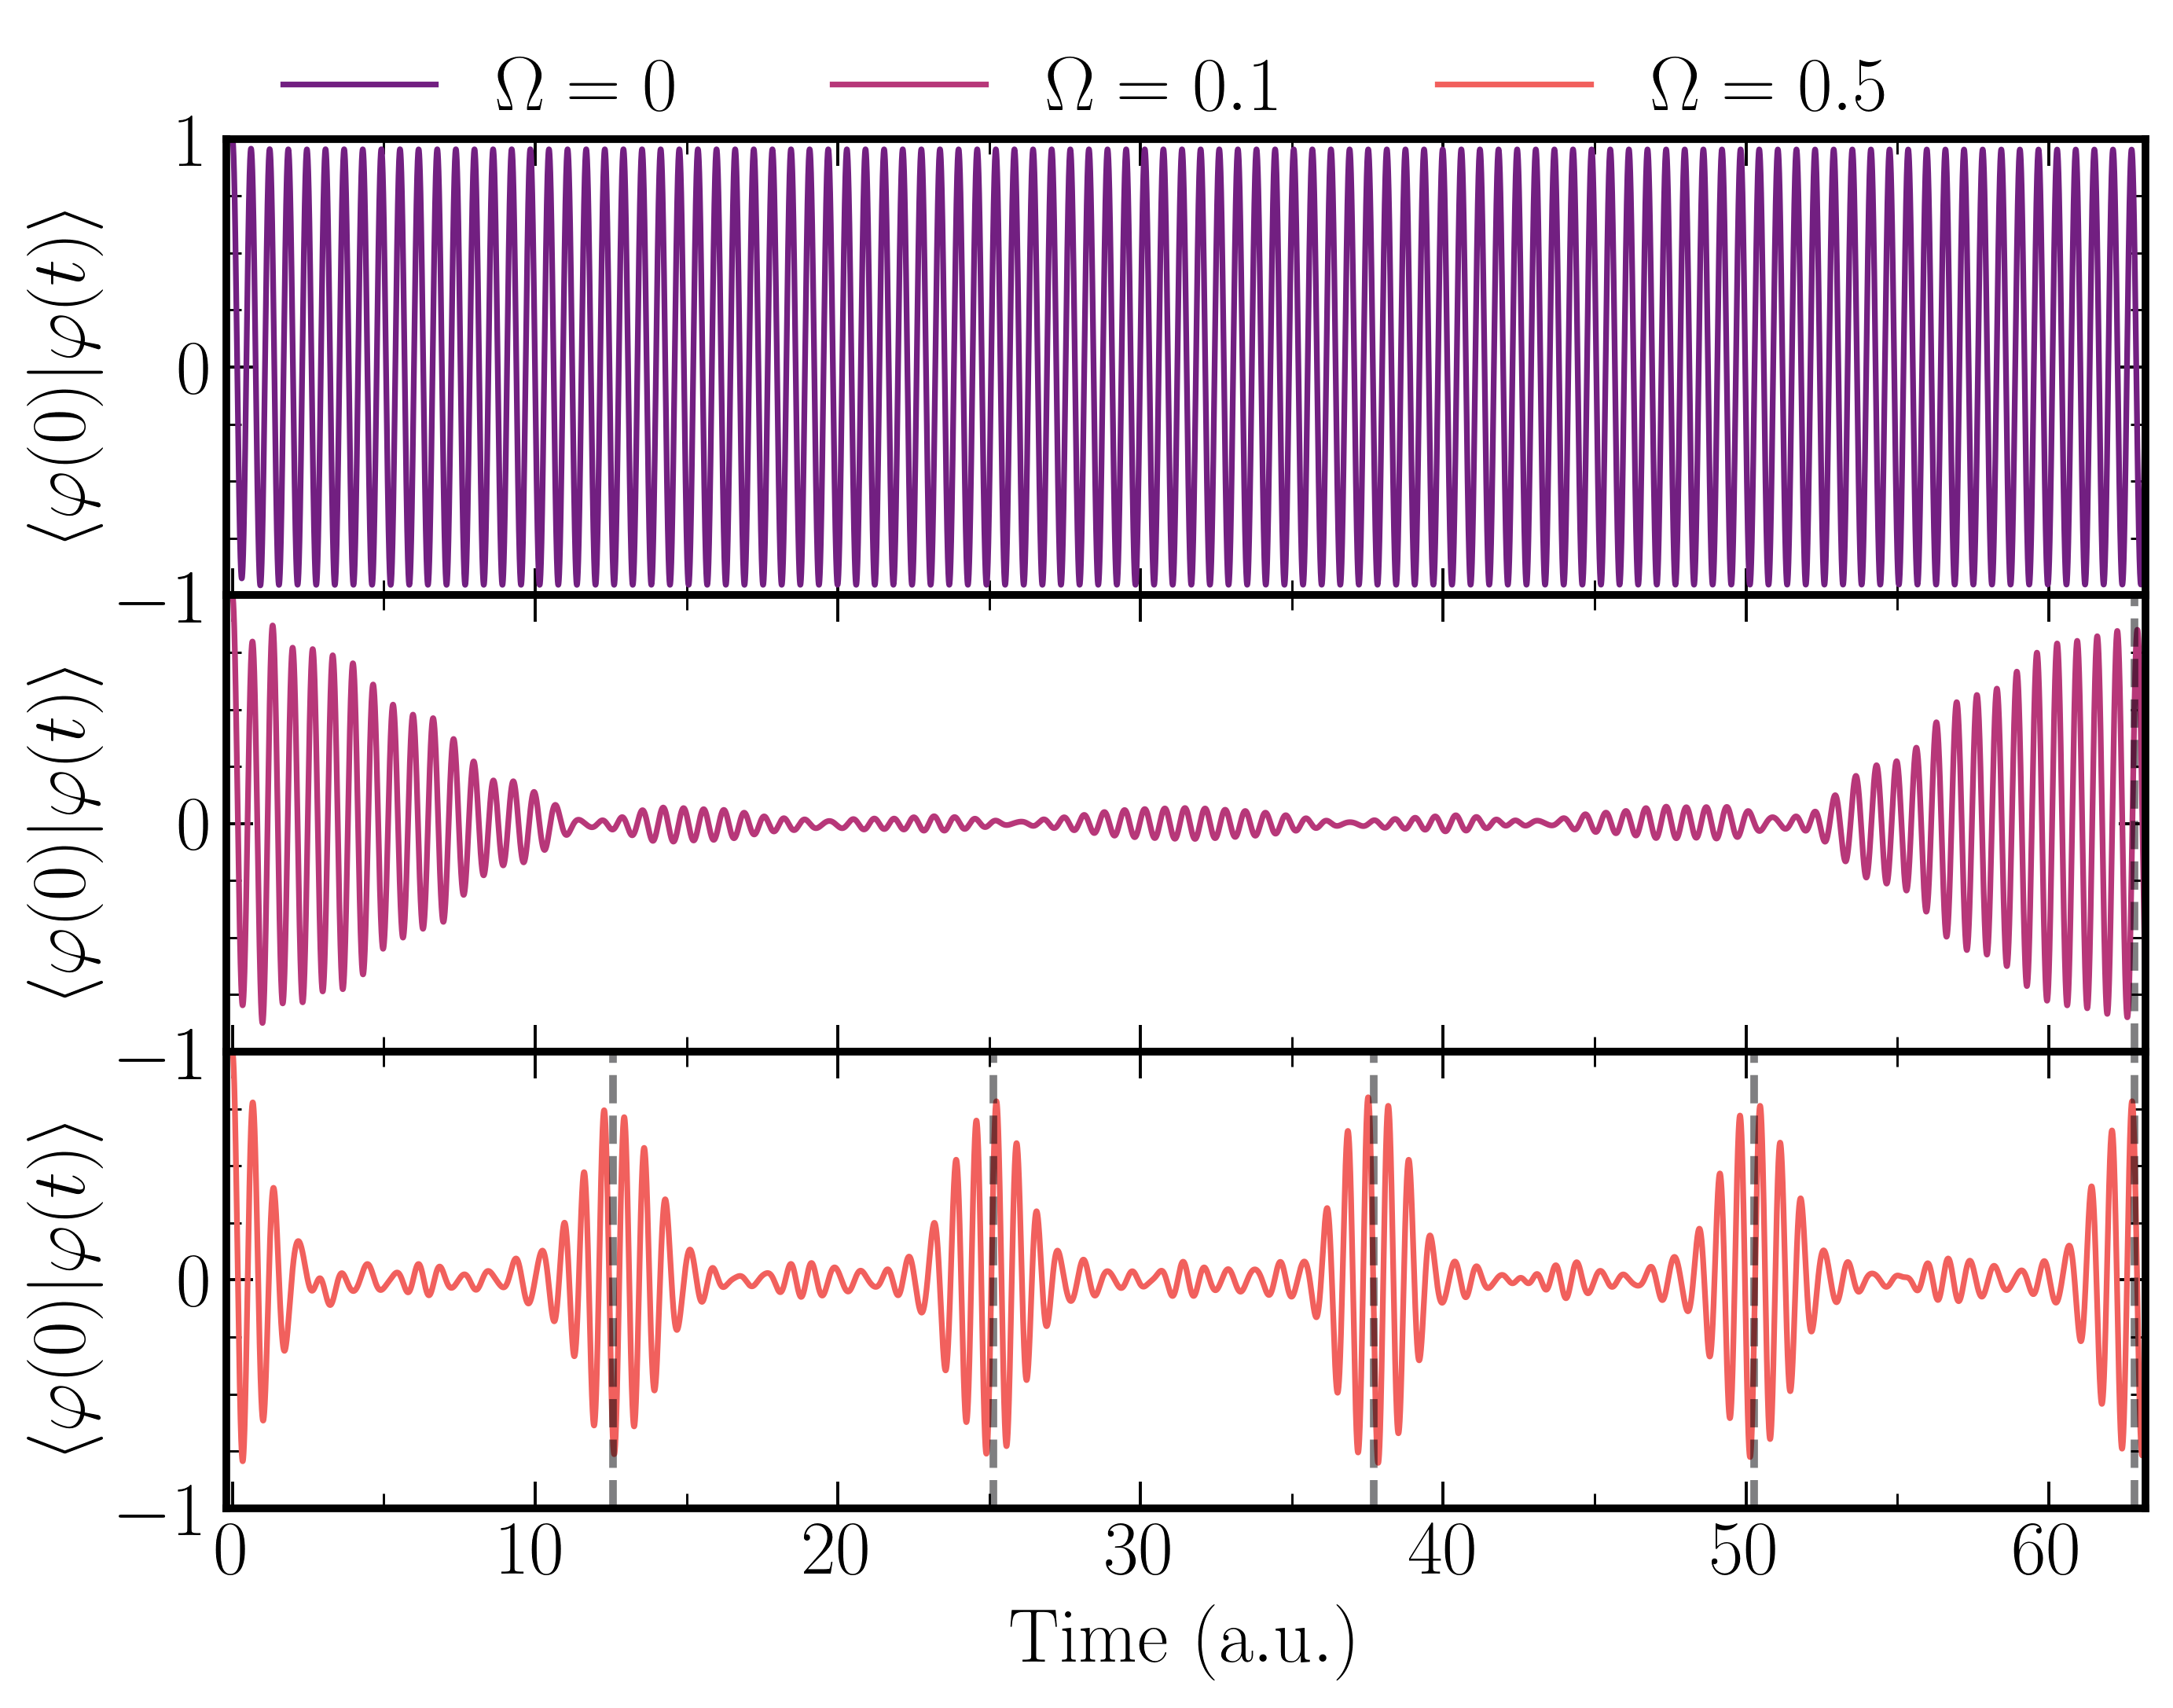

In [5]:
fig, axes = plt.subplots(3, 1, sharex=True,sharey=True, figsize=(8, 6), gridspec_kw={'hspace': 0},dpi=350)
phases = np.array([0,6])
norm2 = Normalize(vmin=-np.pi, vmax=np.pi)
cmap = plt.get_cmap('magma')
sm = ScalarMappable(norm=norm2, cmap=cmap)
sm.set_clim(np.min(phases), np.max(phases))
sm.set_array([])
color = sm.to_rgba(2)
line1, = axes[0].plot(TIME["1000001,0.01,{0},2".format(omega[0])], CORR["1000001,0.01,{0},2".format(omega[0])], color=color, label=r'$\Omega=0$')
color = sm.to_rgba(3)
line2, = axes[1].plot(TIME["1000001,0.01,{0},2".format(omega[1])], CORR["1000001,0.01,{0},2".format(omega[1])], color=color, label=r'$\Omega=0.1$')
for i in np.arange(1, 2)*(2*np.pi/0.1):
    color = sm.to_rgba(0)
    axes[1].axvline(i, color=color, alpha=0.5,linestyle='--', linewidth=2)
color = sm.to_rgba(4)
line3, = axes[2].plot(TIME["1000001,0.01,{0},2".format(omega[2])], CORR["1000001,0.01,{0},2".format(omega[2])], color=color, label=r'$\Omega=0.5$')
for i in np.arange(1, 9)*(2*np.pi/0.5):
    color = sm.to_rgba(0)
    axes[2].axvline(i, color=color, alpha=0.5,linestyle='--', linewidth=2)

plt.xlabel(r'$\mathrm{Time \ (a.u.)}$',fontsize=20)
# 添加图例
for ax in axes:
    minor_locator_x = MultipleLocator(5)
    minor_locator_y = MultipleLocator(0.25)
    ax.xaxis.set_minor_locator(minor_locator_x)
    ax.yaxis.set_minor_locator(minor_locator_y)
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.set_ylim(-1,1)
    ax.set_xlim(-0.2,63.2)
    ax.set_ylabel(r'$\langle \varphi(0)| \varphi(t) \rangle$',fontsize=20)
    # 设置整个图形的边框粗度
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.tick_params(axis='both', which='major', labelsize=20, size=7)
    # 增加次刻度的高度
    ax.tick_params(axis='both', which='minor', length=4)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, frameon=False, fontsize=20)
plt.tight_layout()